In [1]:
import tensorflow as tf


In [ ]:
tf.__version__


'2.6.0'

In [ ]:
tf.keras.__version__


'2.6.0'

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train_full,y_train_full),(x_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train_full.shape

(60000,)

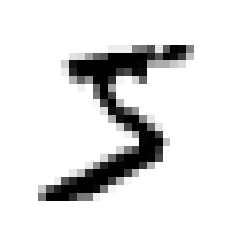

In [ ]:
img = x_train_full[0]

plt.imshow(img, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
img1 = x_train_full


In [ ]:
img.max(),img.min()

(255, 0)

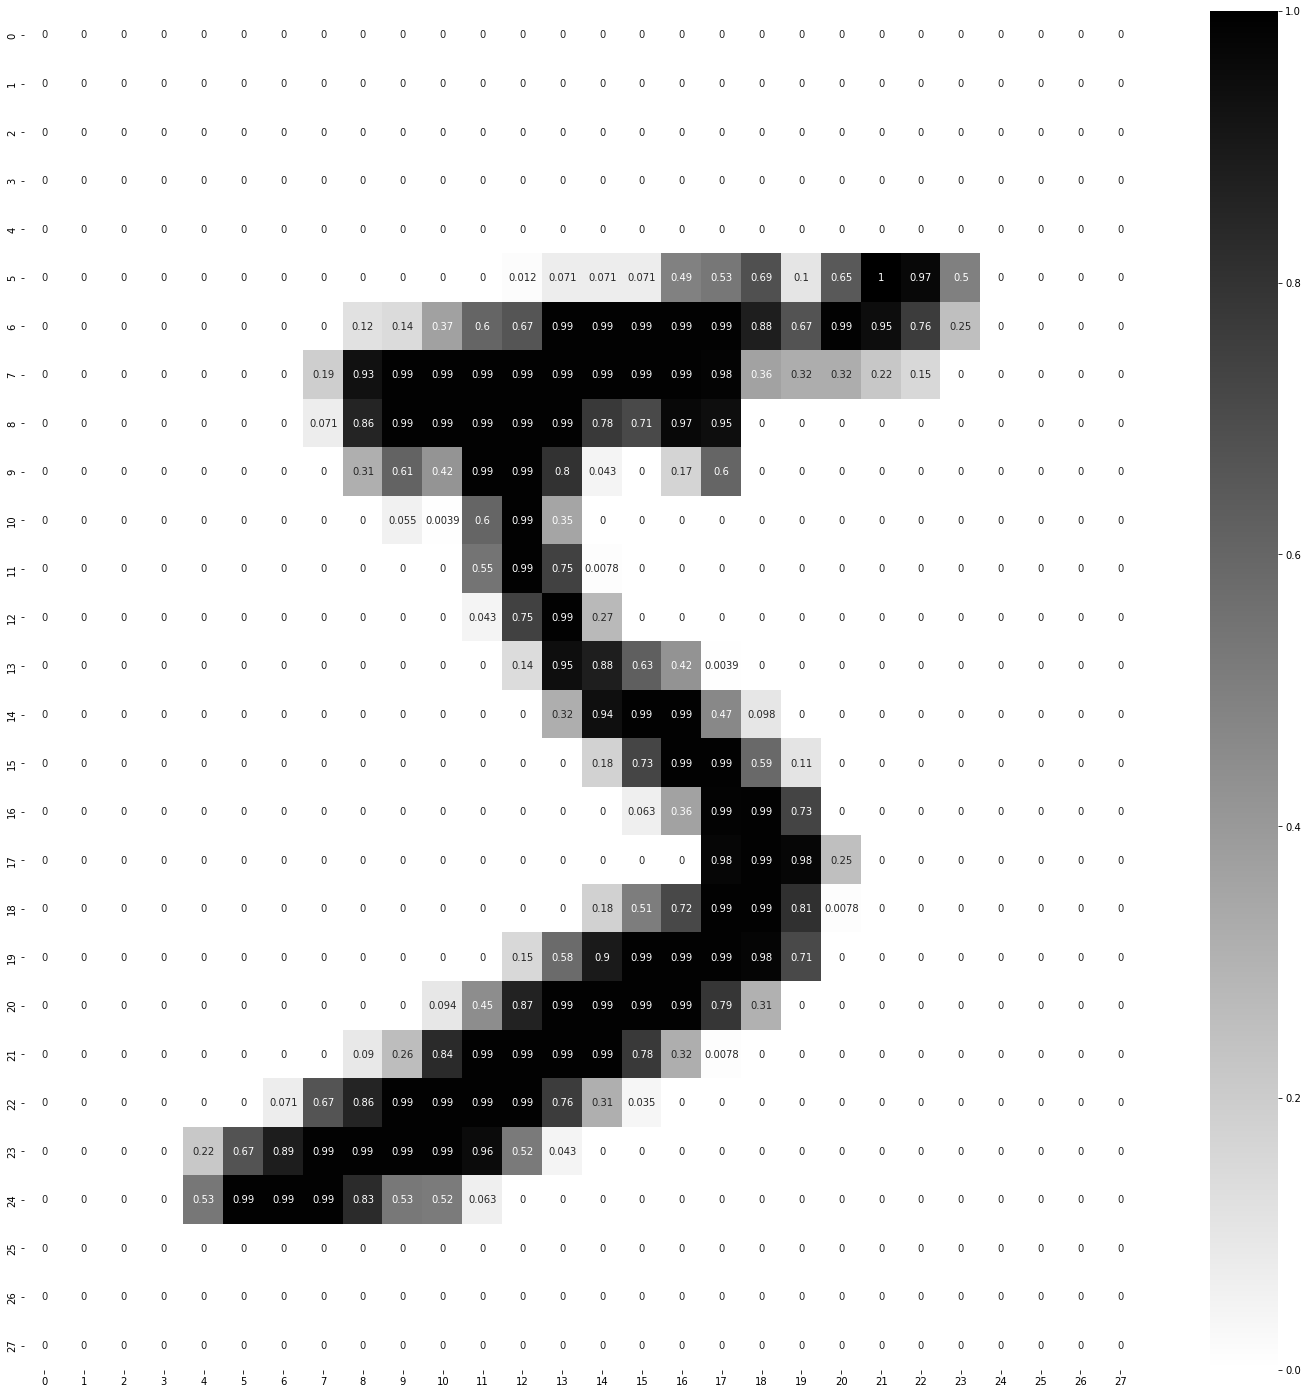

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(img/255,cmap='binary',annot=True)
plt.show()

In [5]:


x_valid, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


x_test = x_test / 255.

In [6]:
hidden = [300,100,10]

In [ ]:
hidden[0]

300

In [7]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputlayer"),
          tf.keras.layers.Dense(300,activation="relu", name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation="relu", name="hiddenlayer2"),
          tf.keras.layers.Dense(10,activation="softmax", name="outputlayer")
]

In [8]:
model_tf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_tf.layers

In [ ]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_tf.layers[1].name

'hiddenlayer1'

In [9]:
weights, biases = model_tf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [10]:
LOSS = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = "accuracy"

In [11]:
model_tf.compile(loss=LOSS,optimizer=OPTIMIZER,metrics=METRICS,)

In [12]:
EPOCHS = 1
VALIDATION = (x_valid,y_valid)
run_stats = model_tf.fit(x=x_train, y=y_train , epochs=EPOCHS, validation_data=VALIDATION)

1719/1719 [==============================] - 10s 4ms/step - loss: 2.1440 - accuracy: 0.0972 - val_loss: 2.1327 - val_accuracy: 0.0868


In [ ]:
run_stats.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [13]:
df = pd.DataFrame(run_stats.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.143969,0.097164,2.132684,0.0868


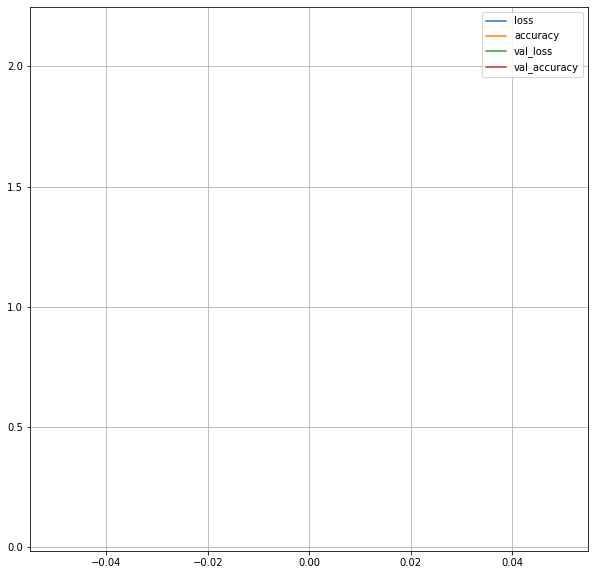

In [14]:
x = df.plot(figsize=(10,10))
plt.grid(True)

plt.show()
plt.savefig

In [ ]:
model_tf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.0266 - accuracy: 0.1010


[4.026628494262695, 0.10100000351667404]

In [ ]:
y_pred = model_tf.predict(x_test[:3])
y_pred.round(3)

array([[ 11.38 ,   0.   ,  30.336,  66.521,   7.668,  26.648,  12.681,
         22.047,  12.452,  30.412],
       [ 20.546,   0.   ,  97.469, 167.82 ,  17.576,  67.63 ,  41.567,
         44.577,  28.759,  80.256],
       [  8.062,   0.   ,  51.707,  87.233,   9.714,  34.001,  18.985,
         21.789,  13.459,  43.547]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=-1)

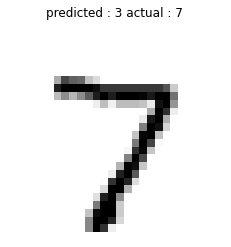

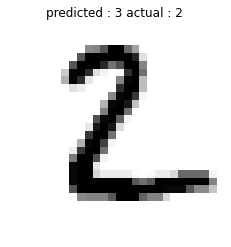

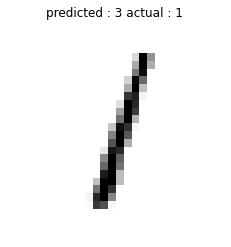

In [ ]:
for data, pred, actual in zip(x_test[:3],y_pred,y_test[:3]):
  plt.imshow(data,cmap='binary')
  plt.title(f"predicted : {pred} actual : {actual} ")
  plt.axis("off")
  plt.grid(True)
  plt.show()


In [ ]:
model_tf.save("model_basic_tf.h5")